In [161]:
import os
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt

In [162]:
data_path = Path(os.getenv("DATA_PATH"))
out_path = data_path / "generated"

ZONE = "19.1.01"

In [163]:
level = "coarse"
df_points = gpd.read_file(
    out_path / level / "points" / "remove_unused" / f"{ZONE}.gpkg",
)
df_poly = gpd.read_file(out_path / level / "polygons" / "labeled" / f"{ZONE}.gpkg")

In [171]:
df_merged = (
    df_points.merge(df_poly[["label", "medoid"]], on="label")
    .assign(category=lambda df: df["codigo_act"].astype(str).str[:2].astype(int))
    .drop(columns=["label", "codigo_act"])
    .groupby(["medoid", "category"])
    # ["num_empleos_esperados"]
    # .sum()
    .size()
    .reset_index()
    .query("~(category in [46, 72, 81])")
    .pivot_table(index="medoid", columns="category", values=0, fill_value=0)
)
df_merged = df_merged.divide(df_merged.sum(axis=1), axis=0)

In [175]:
for idx, row in df_merged.iterrows():
    print(idx, row.sort_values(ascending=False).head(4).index.sort_values().tolist())

0 [31, 33, 43, 61]
1 [31, 52, 61, 62]
2 [43, 52, 54, 62]
3 [33, 43, 61, 62]


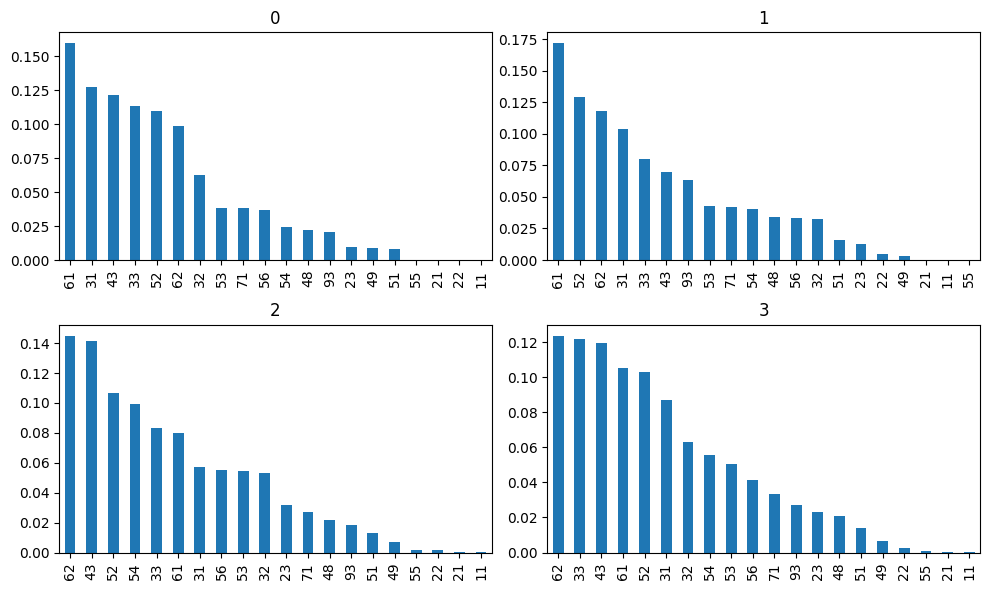

In [176]:
fig, axes = plt.subplots(len(df_merged) // 2, 2, figsize=(10, 6))

for ax, (idx, row) in zip(axes.flat, df_merged.iterrows(), strict=False):
    row.sort_values(ascending=False).plot.bar(ax=ax)
    ax.set_title(idx)
    ax.set_xlabel("")

fig.tight_layout()

<Axes: >

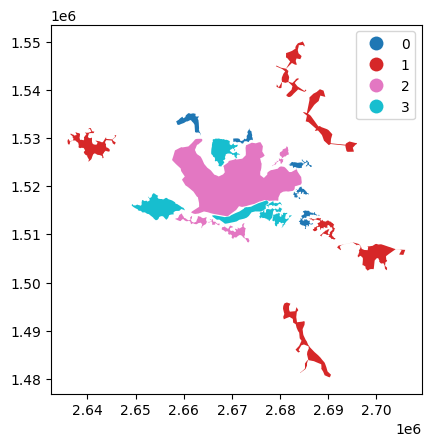

In [167]:
df_poly.plot(column="medoid", categorical=True, legend=True)